# Load Libraries

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt

In [2]:
random_state = 99

# Load Data

In [3]:
X_train = np.loadtxt("X_train.txt")
X_test = np.loadtxt("X_test.txt")
y_train = np.loadtxt("y_train.txt")
y_test = np.loadtxt("y_test.txt")

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7352, 561)
(2947, 561)
(7352,)
(2947,)


# Preprocessing

## Dimension Reduction (PCA vs LDA)

In [4]:
pca = PCA(n_components='mle', random_state=random_state)
lda = LinearDiscriminantAnalysis()

pca = pca.fit(X_train)
lda = lda.fit(X_train, y_train)

pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)
lda_train = lda.transform(X_train)
lda_test = lda.transform(X_test)

print(pca_train.shape)
print(pca_test.shape)
print(lda_train.shape)
print(lda_test.shape)

(7352, 470)
(2947, 470)
(7352, 5)
(2947, 5)


In [5]:
svc_pca = SVC(random_state=random_state)
svc_pca = svc_pca.fit(pca_train, y_train)
svc_pca_predict = svc_pca.predict(pca_test)
svc_pca_score = f1_score(y_test, svc_pca_predict, average='micro')
print(svc_pca_score)


svc_lda = SVC(random_state=random_state)
svc_lda = svc_lda.fit(lda_train, y_train)
svc_lda_predict = svc_lda.predict(lda_test)
svc_lda_score = f1_score(y_test, svc_lda_predict, average='micro')
print(svc_lda_score)

0.9562266711910418
0.9650492025788938


In [6]:
rf_pca = RandomForestClassifier(random_state=random_state)
rf_pca = rf_pca.fit(pca_train, y_train)
rf_pca_predict = rf_pca.predict(pca_test)
rf_pca_score = f1_score(y_test, rf_pca_predict, average='micro')
print(rf_pca_score)


rf_lda = RandomForestClassifier(random_state=random_state)
rf_lda = rf_lda.fit(lda_train, y_train)
rf_lda_predict = rf_lda.predict(lda_test)
rf_lda_score = f1_score(y_test, rf_lda_predict, average='micro')
print(rf_lda_score)

0.8785205293518833
0.9633525619273838


In [7]:
ab_pca = AdaBoostClassifier(random_state=random_state)
ab_pca = ab_pca.fit(pca_train, y_train)
ab_pca_predict = ab_pca.predict(pca_test)
ab_pca_score = f1_score(y_test, ab_pca_predict, average='micro')
print(ab_pca_score)


ab_lda = AdaBoostClassifier(random_state=random_state)
ab_lda = ab_lda.fit(lda_train, y_train)
ab_lda_predict = ab_lda.predict(lda_test)
ab_lda_score = f1_score(y_test, ab_lda_predict, average='micro')
print(ab_lda_score)

0.5191720393620631
0.684085510688836


In [8]:
cv = 3

cv_svc_pca = cross_val_score(svc_pca, pca_train, y_train, cv=cv)
cv_svc_lda = cross_val_score(svc_lda, lda_train, y_train, cv=cv)
cv_rf_pca = cross_val_score(rf_pca, pca_train, y_train, cv=cv)
cv_rf_lda = cross_val_score(rf_lda, lda_train, y_train, cv=cv)
cv_ab_pca = cross_val_score(ab_pca, pca_train, y_train, cv=cv)
cv_ab_lda = cross_val_score(ab_lda, lda_train, y_train, cv=cv)

print("SVC CV (PCA): ", cv_svc_pca)
print("SVC CV (LDA): ", cv_svc_lda)
print("RF CV (PCA): ", cv_rf_pca)
print("RF CV (LDA): ", cv_rf_lda)
print("AB CV (PCA): ", cv_ab_pca)
print("AB CV (LDA): ", cv_ab_lda)

SVC CV (PCA):  [0.94532844 0.91350469 0.95346939]
SVC CV (LDA):  [0.98572011 0.98000816 0.99183673]
RF CV (PCA):  [0.8620971  0.85108119 0.87428571]
RF CV (LDA):  [0.98327213 0.98164015 0.98897959]
AB CV (PCA):  [0.5246838  0.34149327 0.54326531]
AB CV (LDA):  [0.8127295  0.82374541 0.68489796]


In [9]:
cv = 4

cv_svc_pca = cross_val_score(svc_pca, pca_train, y_train, cv=cv)
cv_svc_lda = cross_val_score(svc_lda, lda_train, y_train, cv=cv)
cv_rf_pca = cross_val_score(rf_pca, pca_train, y_train, cv=cv)
cv_rf_lda = cross_val_score(rf_lda, lda_train, y_train, cv=cv)
cv_ab_pca = cross_val_score(ab_pca, pca_train, y_train, cv=cv)
cv_ab_lda = cross_val_score(ab_lda, lda_train, y_train, cv=cv)

print("SVC CV (PCA): ", cv_svc_pca)
print("SVC CV (LDA): ", cv_svc_lda)
print("RF CV (PCA): ", cv_rf_pca)
print("RF CV (LDA): ", cv_rf_lda)
print("AB CV (PCA): ", cv_ab_pca)
print("AB CV (LDA): ", cv_ab_lda)

SVC CV (PCA):  0.9341675734494015
SVC CV (LDA):  [0.98095756 0.97878128 0.99075082 0.99347116]
RF CV (PCA):  [0.86942329 0.84874864 0.81936888 0.90533188]
RF CV (LDA):  [0.97986942 0.98095756 0.98966268 0.98857454]
AB CV (PCA):  [0.55440696 0.53373232 0.54352557 0.53917301]
AB CV (LDA):  [0.80903156 0.82100109 0.81828074 0.81991295]


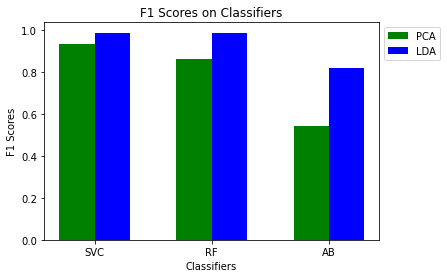

In [13]:
clfs = ['SVC', 'RF', 'AB']
pca_f1_scores = [cv_svc_pca.mean(), cv_rf_pca.mean(), cv_ab_pca.mean()]
lda_f1_scores = [cv_svc_lda.mean(), cv_rf_lda.mean(), cv_ab_lda.mean()]
width = 0.3
x = np.arange(len(clfs))
plt.bar(x, pca_f1_scores, width,color='green',label="PCA")
plt.bar(x + width, lda_f1_scores, width, color='blue', label='LDA')
plt.xticks(x + width / 2, clfs)
plt.xlabel('Classifiers')
plt.ylabel('F1 Scores')
plt.title('F1 Scores on Classifiers')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()